In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#!pip install category_encoders

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_log_error, r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

SEED = 42

In [ ]:
cd gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

In [ ]:
df_test.columns

Index(['ID', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Price'],
      dtype='object')

In [ ]:
features = ['ID', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags','Price']

In [ ]:
train = train[features]
test = test[features]

In [ ]:
train[train["Levy"] == "-"]

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
2,45774419,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,8467
9,45756839,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,26657
11,45814819,-,FORD,Transit,1999,Microbus,No,CNG,4,0 km,8.0,Manual,Rear,02-Mar,Left wheel,Blue,0,8781
12,45815568,-,OPEL,Vectra,1997,Goods wagon,No,CNG,1.6,350000 km,4.0,Manual,Front,04-May,Left wheel,White,4,3000
23,45814106,-,FORD,Transit,2001,Microbus,No,Diesel,2.0 Turbo,230000 km,4.0,Manual,Front,02-Mar,Left wheel,White,0,7840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19223,44571028,-,DODGE,Caliber,2008,Hatchback,No,Petrol,2.4,0 km,4.0,Automatic,Front,04-May,Left wheel,Blue,4,8781
19224,45768089,-,KIA,Optima ex,2014,Sedan,Yes,Petrol,2.4,35800 km,4.0,Automatic,Front,04-May,Left wheel,Black,12,19130
19226,45796788,-,NISSAN,Skyline,2003,Sedan,Yes,Petrol,3,220000 km,6.0,Tiptronic,Rear,04-May,Right-hand drive,White,0,7840
19229,39977395,-,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,150000 km,4.0,Automatic,Front,04-May,Left wheel,Silver,6,50


In [ ]:
train["Manufacturer"].nunique()

65

In [ ]:
train["Manufacturer"].unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [ ]:
train[(train["Manufacturer"] == "LEXUS") & (train["Levy"] == "-")]

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
9,45756839,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,26657
249,45794250,-,LEXUS,GS 350,2013,Sedan,Yes,Petrol,3.5,56000 km,6.0,Tiptronic,Rear,04-May,Left wheel,Black,12,73071
455,45756444,-,LEXUS,NX 200,2017,Jeep,Yes,Petrol,2.0 Turbo,35000 km,4.0,Tiptronic,Front,04-May,Left wheel,Beige,12,79971
485,45781983,-,LEXUS,GX 470,2006,Jeep,Yes,CNG,4.7,180000 km,8.0,Automatic,4x4,04-May,Left wheel,Black,0,42337
603,45815375,-,LEXUS,RX 300,2002,Jeep,Yes,Petrol,3.0 Turbo,201000 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,8,11917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18504,37904919,-,LEXUS,GX 460,2011,Jeep,Yes,Petrol,4.6,170000 km,8.0,Tiptronic,4x4,04-May,Left wheel,Black,12,100
18640,44080587,-,LEXUS,GX 460,2014,Jeep,Yes,Petrol,4.6,92800 km,8.0,Tiptronic,4x4,04-May,Left wheel,Black,10,111332
18696,45774513,-,LEXUS,RX 400 H,2008,Jeep,Yes,Hybrid,3.3,304000 km,6.0,Variator,4x4,04-May,Left wheel,Carnelian red,12,29793
19135,45787015,-,LEXUS,IS 250,2010,Sedan,Yes,Petrol,2.5,201600 km,6.0,Tiptronic,Rear,04-May,Left wheel,Black,8,22580


In [ ]:
train.drop_duplicates(inplace = True)

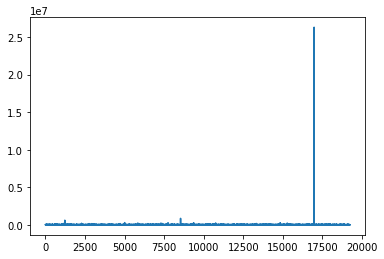

In [ ]:
plt.plot(train["Price"])

In [ ]:
train

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,45654403,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,13328
1,44731507,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,16621
2,45774419,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,8467
3,45769185,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,3607
4,45809263,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,11726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,8467
19233,45778856,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,15681
19234,45804997,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4,26108
19235,45793526,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4,5331


In [ ]:
train["Price"].max()

26307500

In [ ]:
train["Price"].min()

1

In [ ]:
train[train["Price"] == 26307500]

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
16983,45812886,-,OPEL,Combo,1999,Goods wagon,No,Diesel,1.7,99999 km,4.0,Manual,Front,02-Mar,Left wheel,Blue,0,26307500


In [ ]:
train[train["Price"] == 1]

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
7815,45765530,-,OPEL,Astra,1999,Sedan,Yes,Petrol,1.6,122231 km,4.0,Manual,Front,04-May,Left wheel,Silver,4,1
16992,45772201,1202,CHEVROLET,Lacetti,2006,Hatchback,No,Petrol,1.6,200000 km,4.0,Manual,Front,04-May,Left wheel,Black,2,1


In [ ]:
train.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,45654403,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,13328
1,44731507,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,16621
2,45774419,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,8467
3,45769185,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,3607
4,45809263,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,11726


In [ ]:
train[['Mileage']] = train[['Mileage']].replace(to_replace=r'([a-z/]+|[A-Z/]+)', value='', regex=True)
train["Mileage"] = train["Mileage"].astype("str").astype("int")

test[['Mileage']] = test[['Mileage']].replace(to_replace=r'([a-z/]+|[A-Z/]+)', value='', regex=True)
test["Mileage"] = test["Mileage"].astype("str").astype("int")

In [ ]:
duplicateRowsDF = train[train.duplicated()]
duplicateRowsDF

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price


In [ ]:
len(train)

18924

In [ ]:
train["Cylinders"] = train["Cylinders"].astype(int)
test["Cylinders"] = test["Cylinders"].astype(int)

In [ ]:
train["Cylinders"].nunique()

13

In [ ]:
train['Levy'] = train['Levy'].replace("-", "0")
test['Levy'] = test['Levy'].replace("-", "0")

In [ ]:
train["Levy"] = train["Levy"].astype("str").astype("int")
test["Levy"] = test["Levy"].astype("str").astype("int")

In [ ]:
train.dtypes

ID                   int64
Levy                 int64
Manufacturer        object
Model               object
Prod. year           int64
Category            object
Leather interior    object
Fuel type           object
Engine volume       object
Mileage              int64
Cylinders            int64
Gear box type       object
Drive wheels        object
Doors               object
Wheel               object
Color               object
Airbags              int64
Price                int64
dtype: object

In [ ]:
encoder=ce.OneHotEncoder(cols=["Manufacturer", "Model", "Category", "Fuel type", "Engine volume", "Color"], handle_unknown='return_nan',return_df=True,use_cat_names=True)

In [ ]:
train = encoder.fit_transform(train)
test = encoder.fit_transform(test)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



In [ ]:
test["Gear box type"].unique()

array(['Manual', 'Tiptronic', 'Automatic', 'Variator'], dtype=object)

In [ ]:
l = {
    'Automatic' : 2,
     'Tiptronic' : 4,
     'Variator' : 3 ,
     'Manual' : 1
}

In [ ]:
train["Gear box type"] = train["Gear box type"].map(l)
test["Gear box type"] = test["Gear box type"].map(l)

In [ ]:
df_train.dtypes

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [ ]:
train.drop(["ID"], axis = 1, inplace = True)
test.drop(["ID"], axis = 1, inplace = True)

In [ ]:
train.drop(["Drive wheels"], axis = 1, inplace = True)
test.drop(["Drive wheels"], axis = 1, inplace = True)

In [ ]:
train.drop(["Doors"], axis = 1, inplace = True)
test.drop(["Doors"], axis = 1, inplace = True)

In [ ]:
l = {
    "Yes" : 1,
     "No" : 0
}

In [ ]:
train["Leather interior"] = train["Leather interior"].map(l)
test["Leather interior"] = test["Leather interior"].map(l)

In [ ]:
train["Wheel"].unique()

array(['Left wheel', 'Right-hand drive'], dtype=object)

In [ ]:
l = {
    'Left wheel' : 1, 
     'Right-hand drive' : 2
}

In [ ]:
train["Wheel"] = train["Wheel"].map(l)
test["Wheel"] = test["Wheel"].map(l)

In [ ]:
train.head()

,Levy,Manufacturer_LEXUS,Manufacturer_CHEVROLET,Manufacturer_HONDA,Manufacturer_FORD,Manufacturer_HYUNDAI,Manufacturer_TOYOTA,Manufacturer_MERCEDES-BENZ,Manufacturer_OPEL,Manufacturer_PORSCHE,Manufacturer_BMW,Manufacturer_JEEP,Manufacturer_VOLKSWAGEN,Manufacturer_AUDI,Manufacturer_RENAULT,Manufacturer_NISSAN,Manufacturer_SUBARU,Manufacturer_DAEWOO,Manufacturer_KIA,Manufacturer_MITSUBISHI,Manufacturer_SSANGYONG,Manufacturer_MAZDA,Manufacturer_GMC,Manufacturer_FIAT,Manufacturer_INFINITI,Manufacturer_ALFA ROMEO,Manufacturer_SUZUKI,Manufacturer_ACURA,Manufacturer_LINCOLN,Manufacturer_VAZ,Manufacturer_GAZ,Manufacturer_CITROEN,Manufacturer_LAND ROVER,Manufacturer_MINI,Manufacturer_DODGE,Manufacturer_CHRYSLER,Manufacturer_JAGUAR,Manufacturer_ISUZU,Manufacturer_SKODA,Manufacturer_DAIHATSU,...,Engine volume_0.1,Engine volume_1.0 Turbo,Engine volume_6.3,Engine volume_4.5 Turbo,Engine volume_0.8 Turbo,Engine volume_4.2 Turbo,Engine volume_3.1,Engine volume_5.0 Turbo,Engine volume_6.4,Engine volume_3.9,Engine volume_5.7 Turbo,Engine volume_0.9,Engine volume_0.4 Turbo,Engine volume_5.4 Turbo,Engine volume_0.3 Turbo,Engine volume_5.2,Engine volume_5.8,Engine volume_1.1 Turbo,Mileage,Cylinders,Gear box type,Wheel,Color_Silver,Color_Black,Color_White,Color_Grey,Color_Blue,Color_Green,Color_Red,Color_Sky blue,Color_Orange,Color_Yellow,Color_Brown,Color_Golden,Color_Beige,Color_Carnelian red,Color_Purple,Color_Pink,Airbags,Price
0,1399,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,186005,6,2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,13328
1,1018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,192000,6,4,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,16621
2,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200000,4,3,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,8467
3,862,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,168966,4,2,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3607
4,446,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91901,4,2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,11726


In [ ]:
X = train.iloc[ : ,  : -1]
Y = train.iloc[ : , -1 : ]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = SEED, shuffle = True)

In [ ]:
regressor = RandomForestRegressor(random_state = SEED)
regressor.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
predicted = regressor.predict(X_test)

In [ ]:
np.sqrt(mean_squared_log_error(Y_test, predicted))

1.0381181683037248

In [ ]:
mean_squared_log_error(Y_test, predicted)

1.0776893313622808

In [ ]:
r2_score(Y_test, predicted)

-131.28605005646966

In [ ]:
mean_squared_error(Y_test, predicted)

45801162016.07022